In [1]:
import numpy as np
import pandas as pd

In [85]:
weather = pd.read_csv("./Documents/datasets/nyc_weather_2018.csv", parse_dates=["date"])

In [86]:
weather

,date,datatype,station,attributes,value
0,2018-01-01,PRCP,GHCND:US1CTFR0039,",,N,",0.0
1,2018-01-01,PRCP,GHCND:US1NJBG0015,",,N,",0.0
2,2018-01-01,SNOW,GHCND:US1NJBG0015,",,N,",0.0
3,2018-01-01,PRCP,GHCND:US1NJBG0017,",,N,",0.0
4,2018-01-01,SNOW,GHCND:US1NJBG0017,",,N,",0.0
...,...,...,...,...,...
78775,2018-12-31,WDF5,GHCND:USW00094789,",,W,",130.0
78776,2018-12-31,WSF2,GHCND:USW00094789,",,W,",9.8
78777,2018-12-31,WSF5,GHCND:USW00094789,",,W,",12.5
78778,2018-12-31,WT01,GHCND:USW00094789,",,W,",1.0


In [87]:
fb = pd.read_csv("./Documents/datasets/fb_2018.csv", index_col="date", parse_dates=True)

In [88]:
fb.head()

,open,high,low,close,volume
date,,,,,
2018-01-02,177.68,181.58,177.5500,181.42,18151903
2018-01-03,181.88,184.78,181.3300,184.67,16886563
2018-01-04,184.90,186.21,184.0996,184.33,13880896
2018-01-05,185.59,186.90,184.9300,186.85,13574535
2018-01-08,187.20,188.90,186.3300,188.28,17994726


# Arithmetic and statistics

In [89]:
fb.assign(
    abs_z_score_volume=lambda x: \
        x.volume.sub(x.volume.mean()).div(x.volume.std()).abs()
).query("abs_z_score_volume > 3")

,open,high,low,close,volume,abs_z_score_volume
date,,,,,,
2018-03-19,177.01,177.17,170.06,172.56,88140060,3.145078
2018-03-20,167.47,170.20,161.95,168.15,129851768,5.315169
2018-03-21,164.80,173.40,163.30,169.39,106598834,4.105413
2018-03-26,160.82,161.10,149.02,160.06,126116634,5.120845
2018-07-26,174.89,180.13,173.75,176.26,169803668,7.393705


In [90]:
fb.assign(
    volume_pct_change=fb.volume.pct_change(),
    pct_change_rank=lambda x: \
        x.volume_pct_change.abs().rank(ascending=False)
).nsmallest(5, "pct_change_rank")

,open,high,low,close,volume,volume_pct_change,pct_change_rank
date,,,,,,,
2018-01-12,178.06,181.48,177.40,179.37,77551299,7.087876,1.0
2018-03-19,177.01,177.17,170.06,172.56,88140060,2.611789,2.0
2018-07-26,174.89,180.13,173.75,176.26,169803668,1.628841,3.0
2018-09-21,166.64,167.25,162.81,162.93,45994800,1.428956,4.0
2018-03-26,160.82,161.10,149.02,160.06,126116634,1.352496,5.0


In [91]:
fb

,open,high,low,close,volume
date,,,,,
2018-01-02,177.68,181.58,177.5500,181.42,18151903
2018-01-03,181.88,184.78,181.3300,184.67,16886563
2018-01-04,184.90,186.21,184.0996,184.33,13880896
2018-01-05,185.59,186.90,184.9300,186.85,13574535
2018-01-08,187.20,188.90,186.3300,188.28,17994726
...,...,...,...,...,...
2018-12-24,123.10,129.74,123.0200,124.06,22066002
2018-12-26,126.00,134.24,125.8900,134.18,39723370
2018-12-27,132.44,134.99,129.6700,134.52,31202509


In [92]:
fb["2018-01-11":"2018-01-12"]

,open,high,low,close,volume
date,,,,,
2018-01-11,188.40,188.40,187.38,187.77,9588587
2018-01-12,178.06,181.48,177.40,179.37,77551299


In [93]:
(fb > 215).any()

open       True
high       True
low       False
close      True
volume     True
dtype: bool

In [94]:
(fb > 215).all()

open      False
high      False
low       False
close     False
volume     True
dtype: bool

## Ranking

In [95]:
s = pd.Series(range(6), index=list("abcdef"))

In [96]:
s["f"]

5

In [97]:
s["b"]

1

In [98]:
s["d"]

3

In [99]:
s["d"] = s["b"] = s["f"]

In [100]:
s

a    0
b    5
c    2
d    5
e    4
f    5
dtype: int64

In [101]:
s.rank()

a    1.0
b    5.0
c    2.0
d    5.0
e    3.0
f    5.0
dtype: float64

## Binning

In [102]:
fb.volume

date
2018-01-02    18151903
2018-01-03    16886563
2018-01-04    13880896
2018-01-05    13574535
2018-01-08    17994726
                ...   
2018-12-24    22066002
2018-12-26    39723370
2018-12-27    31202509
2018-12-28    22627569
2018-12-31    24625308
Name: volume, Length: 251, dtype: int64

In [103]:
(fb.volume.value_counts() > 1).sum()

0

In [104]:
volume_binned = pd.cut(fb.volume, bins=3, labels=["low", "med", "high"])

In [105]:
volume_binned.value_counts()

volume
low     240
med       8
high      3
Name: count, dtype: int64

In [106]:
fb[volume_binned == "high"].sort_values("volume", ascending=False)

,open,high,low,close,volume
date,,,,,
2018-07-26,174.89,180.13,173.75,176.26,169803668
2018-03-20,167.47,170.20,161.95,168.15,129851768
2018-03-26,160.82,161.10,149.02,160.06,126116634


In [107]:
fb["2018-07-25":"2018-07-26"]

,open,high,low,close,volume
date,,,,,
2018-07-25,215.715,218.62,214.27,217.50,64592585
2018-07-26,174.890,180.13,173.75,176.26,169803668


In [108]:
fb["2018-03-16":"2018-03-20"]

,open,high,low,close,volume
date,,,,,
2018-03-16,184.49,185.33,183.41,185.09,24403438
2018-03-19,177.01,177.17,170.06,172.56,88140060
2018-03-20,167.47,170.20,161.95,168.15,129851768


In [109]:
!pip3 install aiida-core

In [110]:
!dir && cd ./Documents/datasets/ && git clone https://github.com/stefmolin/Hands-On-Data-Analysis-with-Pandas-2nd-edition

 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: 56E5-F02E

 C:\Users\KDS 디렉터리

2024-08-04  오후 01:17    <DIR>          .
2024-08-04  오후 01:17    <DIR>          ..
2024-06-16  오후 02:30    <DIR>          .Albion Online Launcher
2024-08-03  오후 07:08    <DIR>          .anaconda
2024-08-03  오후 10:56    <DIR>          .conda
2024-08-03  오후 07:08                25 .condarc
2024-08-03  오후 07:08    <DIR>          .continuum
2024-08-04  오후 05:47    <DIR>          .docker
2024-05-21  오후 04:06    <DIR>          .dotnet
2024-04-02  오전 11:52                52 .gitconfig
2024-01-27  오전 12:39    <DIR>          .hms
2024-08-03  오후 07:16    <DIR>          .ipython
2024-08-03  오후 07:41    <DIR>          .jupyter
2024-08-04  오후 01:17    <DIR>          .matplotlib
2024-05-21  오후 04:12    <DIR>          .nuget
2024-06-16  오후 02:30    <DIR>          .QtWebEngineProcess
2023-11-03  오후 05:15    <DIR>          .ssh
2024-05-21  오후 04:08    <DIR>          .templateengine
2023-08-25  오후 09:47    <DIR>          .vscode
2024-05-2

fatal: destination path 'Hands-On-Data-Analysis-with-Pandas-2nd-edition' already exists and is not an empty directory.


In [111]:
!cd ./Documents/datasets/Hands-On-Data-Analysis-with-Pandas-2nd-edition/visual-aids && pip3 install .

Processing c:\users\kds\documents\datasets\hands-on-data-analysis-with-pandas-2nd-edition\visual-aids
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Cloning https://github.com/stefmolin/stock-analysis.git (to revision 2nd_edition) to c:\users\kds\appdata\local\temp\pip-install-wr89o70h\stock-analysis_af12ac49d8434dca91496160c5c6982a
  Resolved https://github.com/stefmolin/stock-analysis.git to commit a85af035178626c655d1ba04fd51ff6a4461a113
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for visual_aids: filename=visual_aids-2.0-py3-none-any.whl size=43235 sha256=a041a2415cd5e42a8348249ddea036f08d677630c7134302613c853157b152a4
  Stored in directory: c:\users\kds\appdata\local\pip\cache\wheels\94\c9\a7\94e6aaa1432f2612d4f26f05e849f66dc1f5f10d27fc521fed
Successfully built visual_aids
  Attempting uninstall: visual_aids
    Found existing installation: visual_aids

  Running command git clone --filter=blob:none --quiet https://github.com/stefmolin/stock-analysis.git 'C:\Users\KDS\AppData\Local\Temp\pip-install-wr89o70h\stock-analysis_af12ac49d8434dca91496160c5c6982a'
  Running command git checkout -q a85af035178626c655d1ba04fd51ff6a4461a113


In [112]:
from visual_aids.misc_viz import low_med_high_bins_viz

<Axes: title={'center': 'Daily Volume Traded of Facebook Stock in 2018 (with bins)'}, ylabel='volume traded'>

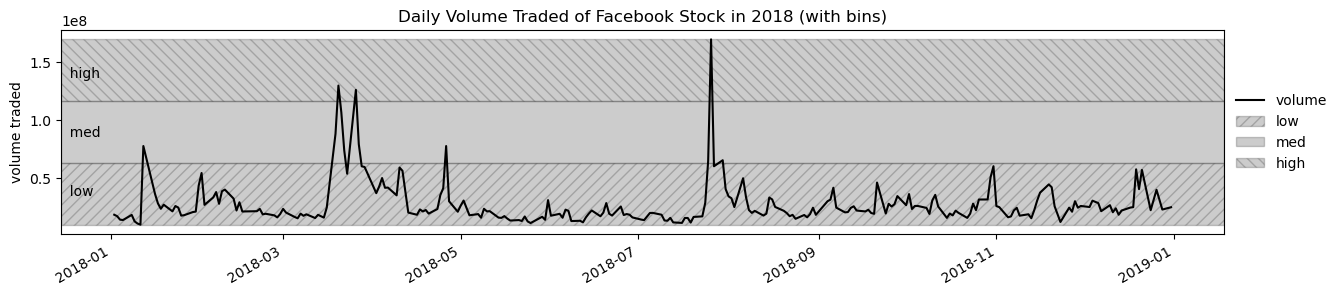

In [113]:
low_med_high_bins_viz(
    fb, "volume", ylabel="volume traded",
    title="Daily Volume Traded of Facebook Stock in 2018 (with bins)"
)

In [114]:
volume_qbinned = pd.qcut(fb.volume, q=4, labels=["q1", "q2", "q3", "q4"])

In [115]:
volume_qbinned.value_counts()

volume
q1    63
q2    63
q4    63
q3    62
Name: count, dtype: int64

In [116]:
from visual_aids.misc_viz import quartile_bins_viz

<Axes: title={'center': 'Daily Volume Traded of Facebook Stock in 2018 (with quartile bins)'}, ylabel='volume traded'>

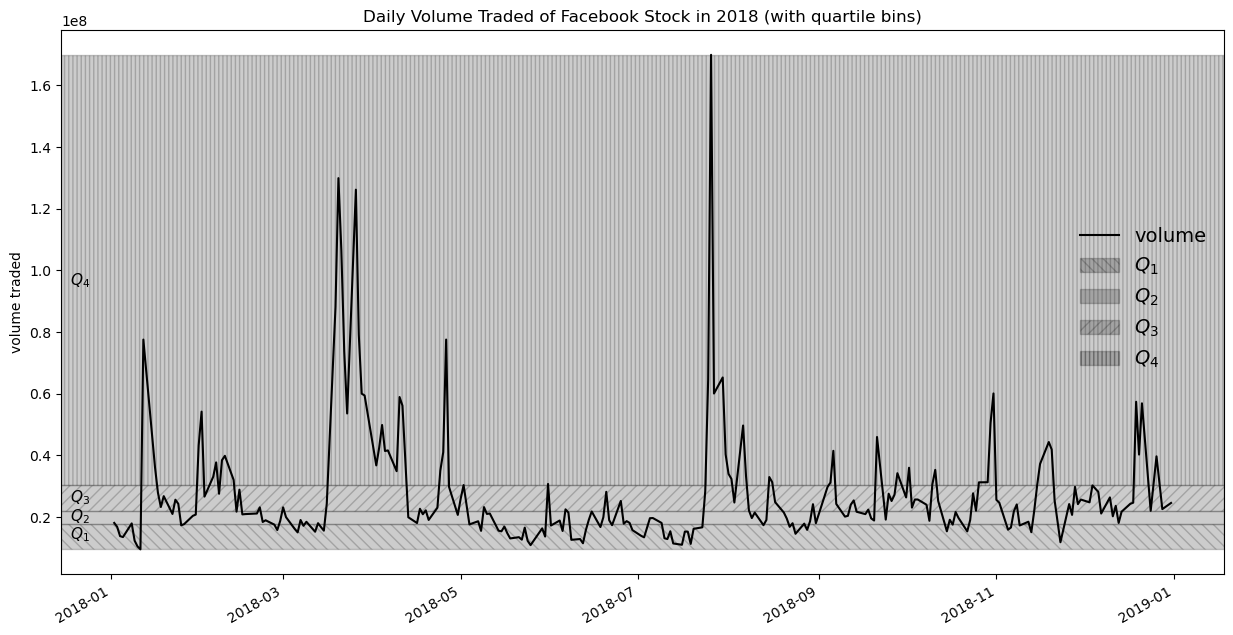

In [117]:
quartile_bins_viz(
    fb, "volume", ylabel="volume traded",
    title="Daily Volume Traded of Facebook Stock in 2018 (with quartile bins)"
)

## Applying Functions

In [118]:
central_park_weather = weather \
    .query('station == "GHCND:USW00094728"') \
    .pivot(index="date", columns="datatype", values="value")
           

In [119]:
central_park_weather

datatype,AWND,PRCP,SNOW,SNWD,TMAX,TMIN,WDF2,WDF5,WSF2,WSF5,WT01,WT02,WT03,WT06,WT08
date,,,,,,,,,,,,,,,
2018-01-01,3.5,0.0,0.0,0.0,-7.1,-13.8,300.0,300.0,6.7,11.2,NaN,NaN,NaN,NaN,NaN
2018-01-02,3.6,0.0,0.0,0.0,-3.2,-10.5,260.0,250.0,7.2,12.5,NaN,NaN,NaN,NaN,NaN
2018-01-03,1.4,0.0,0.0,0.0,-1.0,-8.8,260.0,270.0,6.3,9.8,NaN,NaN,NaN,NaN,NaN
2018-01-04,5.6,19.3,249.0,30.0,-1.6,-7.1,310.0,310.0,10.7,19.2,1.0,1.0,NaN,NaN,1.0
2018-01-05,5.8,0.0,0.0,180.0,-7.1,-12.7,280.0,280.0,9.4,15.7,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-27,NaN,0.0,0.0,0.0,6.7,2.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-12-28,NaN,29.2,0.0,0.0,15.6,6.1,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
2018-12-29,NaN,0.0,0.0,0.0,13.9,3.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [120]:
oct_weather_z_scores = central_park_weather \
    .loc["2018-10", ["TMIN", "TMAX", "PRCP"]] \
    .apply(lambda x: x.sub(x.mean()).div(x.std()))

In [121]:
oct_weather_z_scores.describe().T

,count,mean,std,min,25%,50%,75%,max
datatype,,,,,,,,
TMIN,31.0,-1.790682e-16,1.0,-1.339112,-0.751019,-0.474269,1.065152,1.843511
TMAX,31.0,1.951844e-16,1.0,-1.305582,-0.870013,-0.138258,1.011643,1.604016
PRCP,31.0,1.038596e-16,1.0,-0.394438,-0.394438,-0.394438,-0.240253,3.936167


In [122]:
fb.apply(
    lambda x: np.vectorize(lambda y: len(str(np.ceil(y))))(x)
).astype("int64").equals(
    fb.applymap(lambda x: len(str(np.ceil(x))))
)

C:\Users\KDS\AppData\Local\Temp\ipykernel_5980\4150685393.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  fb.applymap(lambda x: len(str(np.ceil(x))))


True

In [123]:
fb

,open,high,low,close,volume
date,,,,,
2018-01-02,177.68,181.58,177.5500,181.42,18151903
2018-01-03,181.88,184.78,181.3300,184.67,16886563
2018-01-04,184.90,186.21,184.0996,184.33,13880896
2018-01-05,185.59,186.90,184.9300,186.85,13574535
2018-01-08,187.20,188.90,186.3300,188.28,17994726
...,...,...,...,...,...
2018-12-24,123.10,129.74,123.0200,124.06,22066002
2018-12-26,126.00,134.24,125.8900,134.18,39723370
2018-12-27,132.44,134.99,129.6700,134.52,31202509


In [124]:
import time

import numpy as np
import pandas as pd

In [125]:
np.random.seed(0)

In [126]:
vectorized_results = {}
iteritems_results = {}

In [127]:
for size in [10, 100, 1000, 10**4, 10**5, 5 * 10**5, 10 * 10 ** 5, 50 * 10 ** 5, 100 * 10 ** 5]:
    test = pd.Series(np.random.uniform(size=size))

    start = time.time()
    x = test + 10
    end = time.time()

    vectorized_results[size] = end - start

    start = time.time()
    x = []
    
    for i, v in test.items():
        x.append(v + 10)

    x = pd.Series(x)
    end = time.time()

    iteritems_results[size] = end - start

> ```iteritems``` was deprecated.

In [128]:
results = pd.DataFrame(
    [pd.Series(vectorized_results, name="vectorized"), pd.Series(iteritems_results, name="iteritems")]
).T

In [129]:
results

,vectorized,iteritems
10,0.001000,0.001001
100,0.000000,0.000000
1000,0.000000,0.000000
10000,0.000000,0.003001
100000,0.000000,0.033006
500000,0.001000,0.181970
1000000,0.003001,0.364009
5000000,0.011001,1.829661
10000000,0.016519,3.556579


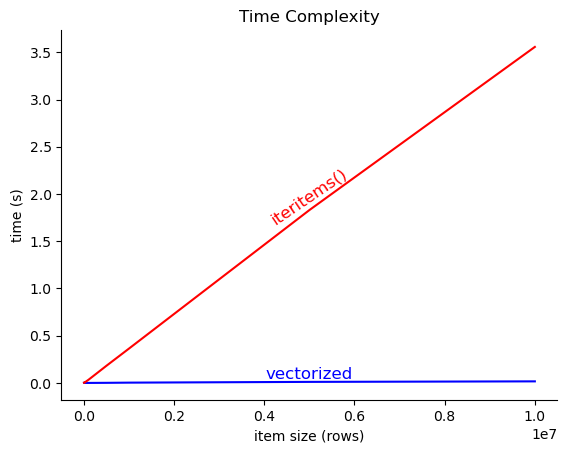

In [131]:
ax = results.plot(title="Time Complexity", color=["blue", "red"], legend=False)

ax.set(xlabel="item size (rows)", ylabel="time (s)")
ax.text(0.5e7, iteritems_results[0.5e7] * .9, "iteritems()", rotation=34, color="red", fontsize=12, ha="center", va="bottom")
ax.text(0.5e7, vectorized_results[0.5e7], "vectorized", color="blue", fontsize=12, ha="center", va="bottom")

for spine in ["top", "right"]:
    ax.spines[spine].set_visible(False)

## Window Calculations

In [130]:
central_park_weather.loc["2018-10"].assign(
    rolling_PRCP=lambda x: x.PRCP.rolling("3D").sum()
)[["PRCP", "rolling_PRCP"]].head(7).T

date,2018-10-01,2018-10-02,2018-10-03,2018-10-04,2018-10-05,2018-10-06,2018-10-07
datatype,,,,,,,
PRCP,0.0,17.5,0.0,1.0,0.0,0.0,0.0
rolling_PRCP,0.0,17.5,17.5,18.5,1.0,1.0,0.0


In [132]:
central_park_weather.loc["2018-10"].rolling("3D").mean().head(7).iloc[:, :6]

datatype,AWND,PRCP,SNOW,SNWD,TMAX,TMIN
date,,,,,,
2018-10-01,0.900000,0.000000,0.0,0.0,24.400000,17.200000
2018-10-02,0.900000,8.750000,0.0,0.0,24.700000,17.750000
2018-10-03,0.966667,5.833333,0.0,0.0,24.233333,17.566667
2018-10-04,0.800000,6.166667,0.0,0.0,24.233333,17.200000
2018-10-05,1.033333,0.333333,0.0,0.0,23.133333,16.300000
2018-10-06,0.833333,0.333333,0.0,0.0,22.033333,16.300000
2018-10-07,1.066667,0.000000,0.0,0.0,22.600000,17.400000


In [133]:
central_park_weather["2018-10-01":"2018-10-07"].rolling("3D").agg(
    {"TMAX": "max", "TMIN": "min", "AWND": "mean", "PRCP": "sum"}
).join(
    central_park_weather[["TMAX", "TMIN", "AWND", "PRCP"]],
    lsuffix="_rolling"
).sort_index(axis=1)

datatype,AWND,AWND_rolling,PRCP,PRCP_rolling,TMAX,TMAX_rolling,TMIN,TMIN_rolling
date,,,,,,,,
2018-10-01,0.9,0.900000,0.0,0.0,24.4,24.4,17.2,17.2
2018-10-02,0.9,0.900000,17.5,17.5,25.0,25.0,18.3,17.2
2018-10-03,1.1,0.966667,0.0,17.5,23.3,25.0,17.2,17.2
2018-10-04,0.4,0.800000,1.0,18.5,24.4,25.0,16.1,16.1
2018-10-05,1.6,1.033333,0.0,1.0,21.7,24.4,15.6,15.6
2018-10-06,0.5,0.833333,0.0,1.0,20.0,24.4,17.2,15.6
2018-10-07,1.1,1.066667,0.0,0.0,26.1,26.1,19.4,15.6


In [134]:
fb_reindexed = fb \
    .reindex(pd.date_range("2018-01-01", "2018-12-31", freq="D")) \
    .assign(
        volume=lambda x: x.volume.fillna(0),
        close=lambda x: x.close.fillna(method="ffill"),
        open=lambda x: x.open.combine_first(x.close),
        high=lambda x: x.high.combine_first(x.close),
        low=lambda x: x.low.combine_first(x.close)
    )

C:\Users\KDS\AppData\Local\Temp\ipykernel_5980\981582692.py:5: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  close=lambda x: x.close.fillna(method="ffill"),


In [135]:
fb_reindexed.assign(day=lambda x: x.index.day_name()).head(10)

,open,high,low,close,volume,day
2018-01-01,NaN,NaN,NaN,NaN,0.0,Monday
2018-01-02,177.68,181.58,177.5500,181.42,18151903.0,Tuesday
2018-01-03,181.88,184.78,181.3300,184.67,16886563.0,Wednesday
2018-01-04,184.90,186.21,184.0996,184.33,13880896.0,Thursday
2018-01-05,185.59,186.90,184.9300,186.85,13574535.0,Friday
2018-01-06,186.85,186.85,186.8500,186.85,0.0,Saturday
2018-01-07,186.85,186.85,186.8500,186.85,0.0,Sunday
2018-01-08,187.20,188.90,186.3300,188.28,17994726.0,Monday
2018-01-09,188.70,188.80,187.1000,187.87,12393057.0,Tuesday
2018-01-10,186.94,187.89,185.6300,187.84,10529894.0,Wednesday


In [136]:
from pandas.api.indexers import VariableOffsetWindowIndexer

In [137]:
indexer = VariableOffsetWindowIndexer(
    index=fb_reindexed.index, offset=pd.offsets.BDay(3)
)

In [138]:
indexer

In [139]:
fb_reindexed.assign(window_start_day=0).rolling(indexer).agg({
    "window_start_day": lambda x: x.index.min().timestamp(),
    "open": "mean", "high": "max", "low": "min",
    "close": "mean", "volume": "sum"
}).join(
    fb_reindexed, lsuffix="_rolling"
).sort_index(axis=1).assign(
    day=lambda x: x.index.day_name(),
    window_start_day = lambda x: pd.to_datetime(x.window_start_day, unit="s")
).head(10)

,close,close_rolling,high,high_rolling,low,low_rolling,open,open_rolling,volume,volume_rolling,window_start_day,day
2018-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,2018-01-01,Monday
2018-01-02,181.42,181.420000,181.58,181.58,177.5500,177.5500,177.68,177.680000,18151903.0,18151903.0,2018-01-01,Tuesday
2018-01-03,184.67,183.045000,184.78,184.78,181.3300,177.5500,181.88,179.780000,16886563.0,35038466.0,2018-01-01,Wednesday
2018-01-04,184.33,183.473333,186.21,186.21,184.0996,177.5500,184.90,181.486667,13880896.0,48919362.0,2018-01-02,Thursday
2018-01-05,186.85,185.283333,186.90,186.90,184.9300,181.3300,185.59,184.123333,13574535.0,44341994.0,2018-01-03,Friday
2018-01-06,186.85,186.010000,186.85,186.90,186.8500,184.0996,186.85,185.780000,0.0,27455431.0,2018-01-04,Saturday
2018-01-07,186.85,186.220000,186.85,186.90,186.8500,184.0996,186.85,186.047500,0.0,27455431.0,2018-01-04,Sunday
2018-01-08,188.28,186.632000,188.90,188.90,186.3300,184.0996,187.20,186.278000,17994726.0,45450157.0,2018-01-04,Monday
2018-01-09,187.87,187.340000,188.80,188.90,187.1000,184.9300,188.70,187.038000,12393057.0,43962318.0,2018-01-05,Tuesday
2018-01-10,187.84,187.538000,187.89,188.90,185.6300,185.6300,186.94,187.308000,10529894.0,40917677.0,2018-01-06,Wednesday


In [140]:
central_park_weather.loc["2018-06"].assign(
    TOTAL_PRCP=lambda x: x.PRCP.cumsum(),
    AVG_PRCP=lambda x: x.PRCP.expanding().mean()
).head(10)[["PRCP", "TOTAL_PRCP", "AVG_PRCP"]].T

date,2018-06-01,2018-06-02,2018-06-03,2018-06-04,2018-06-05,2018-06-06,2018-06-07,2018-06-08,2018-06-09,2018-06-10
datatype,,,,,,,,,,
PRCP,6.9,2.00,6.4,4.10,0.00,0.000000,0.000000,0.000,0.000000,0.30
TOTAL_PRCP,6.9,8.90,15.3,19.40,19.40,19.400000,19.400000,19.400,19.400000,19.70
AVG_PRCP,6.9,4.45,5.1,4.85,3.88,3.233333,2.771429,2.425,2.155556,1.97


In [141]:
central_park_weather["2018-10-01":"2018-10-07"].expanding().agg(
    {"TMAX": np.max, "TMIN": np.min, "AWND": np.mean, "PRCP": np.sum}
).join(
    central_park_weather[["TMAX", "TMIN", "AWND", "PRCP"]],
    lsuffix="_expanding"
).sort_index(axis=1)

C:\Users\KDS\AppData\Local\Temp\ipykernel_5980\1889330321.py:1: FutureWarning: The provided callable <function max at 0x000001C368FF1EE0> is currently using Expanding.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  central_park_weather["2018-10-01":"2018-10-07"].expanding().agg(
C:\Users\KDS\AppData\Local\Temp\ipykernel_5980\1889330321.py:1: FutureWarning: The provided callable <function min at 0x000001C368FF2020> is currently using Expanding.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  central_park_weather["2018-10-01":"2018-10-07"].expanding().agg(
C:\Users\KDS\AppData\Local\Temp\ipykernel_5980\1889330321.py:1: FutureWarning: The provided callable <function mean at 0x000001C368FF28E0> is currently using Expanding.mean. In a future version of pandas, the provided callable will be used directly. To keep 

datatype,AWND,AWND_expanding,PRCP,PRCP_expanding,TMAX,TMAX_expanding,TMIN,TMIN_expanding
date,,,,,,,,
2018-10-01,0.9,0.900000,0.0,0.0,24.4,24.4,17.2,17.2
2018-10-02,0.9,0.900000,17.5,17.5,25.0,25.0,18.3,17.2
2018-10-03,1.1,0.966667,0.0,17.5,23.3,25.0,17.2,17.2
2018-10-04,0.4,0.825000,1.0,18.5,24.4,25.0,16.1,16.1
2018-10-05,1.6,0.980000,0.0,18.5,21.7,25.0,15.6,15.6
2018-10-06,0.5,0.900000,0.0,18.5,20.0,25.0,17.2,15.6
2018-10-07,1.1,0.928571,0.0,18.5,26.1,26.1,19.4,15.6


In [142]:
central_park_weather.assign(
    AVG=lambda x: x.TMAX.rolling("30D").mean(),
    EWMA=lambda x: x.TMAX.ewm(span=30).mean()
).loc["2018-09-29":"2018-10-08", ["TMAX", "EWMA", "AVG"]].T

date,2018-09-29,2018-09-30,2018-10-01,2018-10-02,2018-10-03,2018-10-04,2018-10-05,2018-10-06,2018-10-07,2018-10-08
datatype,,,,,,,,,,
TMAX,22.200000,21.100000,24.400000,25.000000,23.300000,24.400000,21.700000,20.000000,26.100000,23.300000
EWMA,24.410887,24.197281,24.210360,24.261304,24.199285,24.212234,24.050154,23.788854,23.937960,23.896802
AVG,24.723333,24.573333,24.533333,24.460000,24.163333,23.866667,23.533333,23.070000,23.143333,23.196667


## Pipes

f(g(h(data), 20), x = True)

> data.pipe(h).pipe(g, 20).pipe(f, x=True)

In [143]:
def get_info(df):
    return "%d rows, %d columns and max closing Z-score was %d" % (*df.shape, df.close.max())

In [145]:
get_info(fb.loc["2018-Q1"].apply(lambda x: (x - x.mean()) / x.std())) \
    == fb.loc["2018-Q1"].apply(lambda x: (x - x.mean()) / x.std()).pipe(get_info)

True

In [146]:
fb.pipe(pd.DataFrame.rolling, "20D").mean().equals(fb.rolling("20D").mean())

True

In [147]:
pd.DataFrame.rolling(fb, "20D").mean().equals(fb.rolling("20D").mean())

True

In [151]:
def window_calc(df, func, agg_dict, *args, **kwargs):
    return df.pipe(func, *args, **kwargs).agg(agg_dict)

In [153]:
window_calc(fb, pd.DataFrame.expanding, np.median).head()

C:\Users\KDS\AppData\Local\Temp\ipykernel_5980\469519869.py:2: FutureWarning: The provided callable <function median at 0x000001C369135620> is currently using Expanding.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  return df.pipe(func, *args, **kwargs).agg(agg_dict)


,open,high,low,close,volume
date,,,,,
2018-01-02,177.68,181.580,177.5500,181.420,18151903.0
2018-01-03,179.78,183.180,179.4400,183.045,17519233.0
2018-01-04,181.88,184.780,181.3300,184.330,16886563.0
2018-01-05,183.39,185.495,182.7148,184.500,15383729.5
2018-01-08,184.90,186.210,184.0996,184.670,16886563.0


In [154]:
window_calc(fb, pd.DataFrame.ewm, "mean", span=3).head()

,open,high,low,close,volume
date,,,,,
2018-01-02,177.680000,181.580000,177.550000,181.420000,1.815190e+07
2018-01-03,180.480000,183.713333,180.070000,183.586667,1.730834e+07
2018-01-04,183.005714,185.140000,182.372629,184.011429,1.534980e+07
2018-01-05,184.384000,186.078667,183.736560,185.525333,1.440299e+07
2018-01-08,185.837419,187.534839,185.075110,186.947097,1.625679e+07


In [155]:
window_calc(
    central_park_weather.loc["2018-10"],
    pd.DataFrame.rolling,
    {"TMAX": "max", "TMIN": "min", "AWND": "mean", "PRCP": "sum"},
    "3D"
).head()

datatype,TMAX,TMIN,AWND,PRCP
date,,,,
2018-10-01,24.4,17.2,0.900000,0.0
2018-10-02,25.0,17.2,0.900000,17.5
2018-10-03,25.0,17.2,0.966667,17.5
2018-10-04,25.0,16.1,0.800000,18.5
2018-10-05,24.4,15.6,1.033333,1.0
